In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense,Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,precision_recall_curve

In [2]:
col_names=['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone',
           'breathes','venomous','fins','legs','tail','domestic','catsize','type']
data = pd.read_csv('zoo.data',header=None,names=col_names)

In [3]:
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


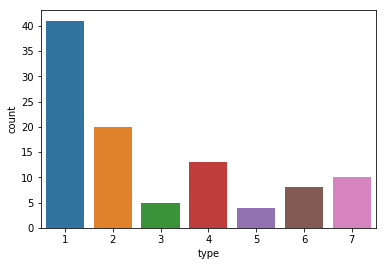

In [5]:
print(data['type'].value_counts())
sns.countplot(data['type'])

In [6]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1,-0.43,-0.82,0.88,-0.2,-0.47,-0.15,0.49,0.19,0.44,-0.1,-0.28,0.39,0.049,0.21,0.46,-0.56
feathers,-0.43,1,0.42,-0.41,0.66,-0.059,-0.1,-0.61,0.23,0.25,-0.15,-0.22,-0.21,0.29,0.032,-0.14,-0.2
eggs,-0.82,0.42,1,-0.94,0.38,0.38,0.012,-0.64,-0.34,-0.38,0.099,0.16,-0.22,-0.22,-0.16,-0.51,0.66
milk,0.88,-0.41,-0.94,1,-0.37,-0.36,-0.03,0.63,0.38,0.42,-0.24,-0.16,0.21,0.21,0.16,0.57,-0.72
airborne,-0.2,0.66,0.38,-0.37,1,-0.17,-0.3,-0.59,-0.1,0.29,0.0085,-0.25,0.044,0.0095,0.063,-0.35,0.023
aquatic,-0.47,-0.059,0.38,-0.36,-0.17,1,0.38,0.053,0.022,-0.64,0.088,0.6,-0.36,-0.035,-0.22,-0.11,0.33
predator,-0.15,-0.1,0.012,-0.03,-0.3,0.38,1,0.13,0.051,-0.26,0.12,0.19,-0.1,0.019,-0.31,0.14,0.061
toothed,0.49,-0.61,-0.64,0.63,-0.59,0.053,0.13,1,0.58,-0.066,-0.062,0.36,-0.19,0.31,0.069,0.34,-0.47
backbone,0.19,0.23,-0.34,0.38,-0.1,0.022,0.051,0.58,1,0.21,-0.25,0.21,-0.43,0.73,0.1,0.36,-0.83
breathes,0.44,0.25,-0.38,0.42,0.29,-0.64,-0.26,-0.066,0.21,1,-0.12,-0.62,0.37,0.089,0.12,0.2,-0.52


In [7]:
#drop highly correlated features
data = data.drop(['hair','eggs'],axis=1)

In [19]:
X = data.drop(['animal_name','type'],axis=1)
y = data['type']
#Handling categorical data by one hot encoding
legs = pd.get_dummies(X['legs'])
X = pd.concat([X.drop(['legs'],axis=1),legs],axis=1)
y = pd.get_dummies(y)
print("X shape: ",X.shape)
print("y.shape: ",y.shape)

X shape:  (101, 19)
y.shape:  (101, 7)


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),input_dim=19))
model.add(Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=(0.2))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                640       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 7)                 77        
Total params: 1,157
Trainable params: 1,157
Non-trainable params: 0
_________________________________________________________________
None
Train on 64 samples, validate on 16 samples
Epoch 1/100
64/64 [==============================] - 0s 6ms/step - loss: 1.9471 - acc: 0.2500 - val_loss: 1.9081 - val_acc: 0.3125
Epoch 2/100
64/64 [==============================] - 0s 140us/step - loss: 1.8801 - acc: 0.2

64/64 [==============================] - 0s 320us/step - loss: 0.4307 - acc: 0.9219 - val_loss: 0.4803 - val_acc: 0.8750
Epoch 56/100
64/64 [==============================] - 0s 187us/step - loss: 0.4215 - acc: 0.9219 - val_loss: 0.4769 - val_acc: 0.8750
Epoch 57/100
64/64 [==============================] - 0s 240us/step - loss: 0.4076 - acc: 0.9219 - val_loss: 0.4758 - val_acc: 0.8750
Epoch 58/100
64/64 [==============================] - 0s 165us/step - loss: 0.3976 - acc: 0.9219 - val_loss: 0.4720 - val_acc: 0.8750
Epoch 59/100
64/64 [==============================] - 0s 255us/step - loss: 0.3866 - acc: 0.9219 - val_loss: 0.4667 - val_acc: 0.8750
Epoch 60/100
64/64 [==============================] - 0s 264us/step - loss: 0.3787 - acc: 0.9219 - val_loss: 0.4641 - val_acc: 0.8750
Epoch 61/100
64/64 [==============================] - 0s 218us/step - loss: 0.3671 - acc: 0.9219 - val_loss: 0.4624 - val_acc: 0.8750
Epoch 62/100
64/64 [==============================] - 0s 258us/step - loss:

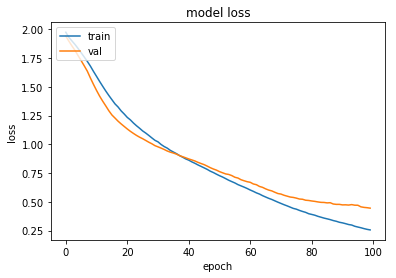

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()